In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/feature1/F1.csv


In [42]:
import scikeras

ModuleNotFoundError: No module named 'scikeras'

In [13]:
f1=pd.read_csv(r'/kaggle/input/feature1/F1.csv')
ftrain=pd.read_csv(r'/kaggle/input/gestures/F.csv')
ftest=pd.read_csv(r'/kaggle/input/gestures/Ftest.csv')

In [19]:
y=[0]*20+[1]*20+[2]*20+[3]*20+[4]*20
print(y)
ytrain=y*8
ytest=y*3

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [20]:
features=ftrain
labels=ytrain

In [16]:
ftrain.head()

,0,1,2,3
0,644.291440,2198.997300,198.55,3971.0
1,646.527300,2251.608000,199.15,3983.0
2,637.601400,2169.418500,196.45,3929.0
3,541.544560,9360.366000,142.95,2859.0
4,65.757126,4.115789,20.70,414.0


In [17]:
ftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       800 non-null    float64
 1   1       800 non-null    float64
 2   2       800 non-null    float64
 3   3       800 non-null    float64
dtypes: float64(4)
memory usage: 25.1 KB


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Assuming your data is in two separate lists
# features: A list of size 200 (40 samples for each gesture), where each element is a list of 4 features (RMS, variance, mean, iemg)
# labels: A separate list of size 200 containing the integer labels (0-4) for each sample

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
labels_encoded = encoder.fit_transform(np.array(labels).reshape(-1, 1))

# Convert features list to NumPy array
features_np = np.array(features)

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded, test_size=0.2, random_state=42)

# Define the CNN model (example with Conv1D)
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(4, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1810 - loss: 205.8883 - val_accuracy: 0.1813 - val_loss: 181.5682
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2159 - loss: 51.5984 - val_accuracy: 0.1625 - val_loss: 76.1895
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1990 - loss: 40.3471 - val_accuracy: 0.2250 - val_loss: 178.5418
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1811 - loss: 34.1243 - val_accuracy: 0.2250 - val_loss: 83.5493
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2053 - loss: 37.4094 - val_accuracy: 0.1875 - val_loss: 268.0190
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1797 - loss: 35.7892 - val_accuracy: 0.2313 - val_loss: 116.7798
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2195 - loss: 23.0829 - val_accuracy: 0.2313 - val_loss: 149.9644
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2041 - loss: 31.9707 - val_accuracy: 0.1813 

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Minimum validation loss: 19.16197395324707


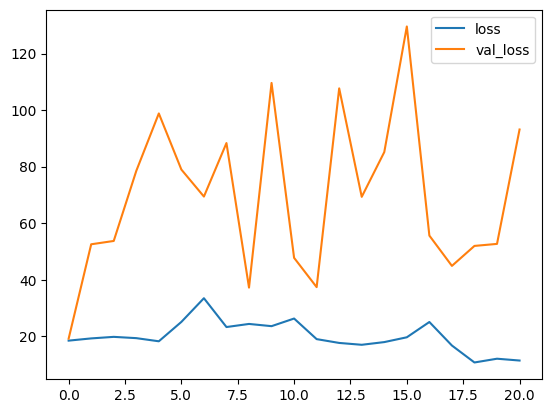

In [25]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=50,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Assuming your data is in two separate lists
# features: A list of size 200 (40 samples for each gesture), where each element is a list of 4 features (RMS, variance, mean, iemg)
# labels: A separate list of size 200 containing the integer labels (0-4) for each sample

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
labels_encoded = encoder.fit_transform(np.array(labels).reshape(-1, 1))

# Convert features list to NumPy array
features_np = np.array(features)

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded, test_size=0.2, random_state=42)

# Define the CNN model with BatchNormalization and Dropout
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(4, 1)))  # Adjust filter size, number of filters
model.add(BatchNormalization())  # Added BatchNormalization after Conv1D
model.add(Dropout(0.2))  # Added Dropout after BatchNormalization
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())  # Added BatchNormalization after Dense
model.add(Dropout(0.3))  # Added Dropout after BatchNormalization
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1509 - loss: 2.3822 - val_accuracy: 0.2125 - val_loss: 5.7781
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2310 - loss: 2.0968 - val_accuracy: 0.2188 - val_loss: 4.8081
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2439 - loss: 1.9932 - val_accuracy: 0.2313 - val_loss: 4.5431
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2270 - loss: 1.9958 - val_accuracy: 0.2313 - val_loss: 4.6796
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2270 - loss: 1.8750 - val_accuracy: 0.1937 - val_loss: 4.7900
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2579 - loss: 1.8590 - val_accuracy: 0.1813 - val_loss: 5.1351
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2166 - loss: 1.8327 - val_accuracy: 0.1813 - val_loss: 4.3797
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2146 - loss: 1.8294 - val_accuracy: 0.1875 - val_loss: 4.3835
Ep

Minimum validation loss: 2.2454047203063965


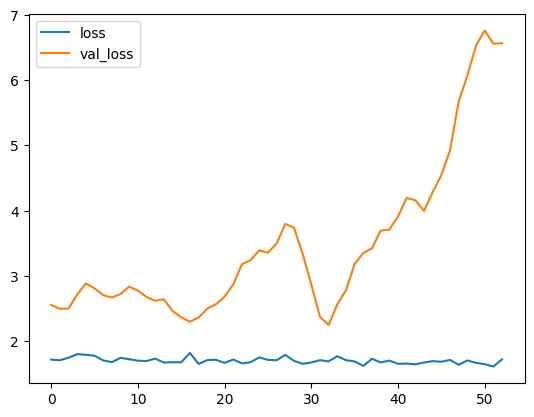

In [29]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=200,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [41]:
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
#from scikeras.wrappers import KerasClassifier

# Assuming your data is in two separate lists
# features: A list of size 200 (40 samples for each gesture), where each element is a list of 4 features (RMS, variance, mean, iemg)
# labels: A separate list of size 200 containing the integer labels (0-4) for each sample

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
labels_encoded = encoder.fit_transform(np.array(labels).reshape(-1, 1))

# Convert features list to NumPy array
features_np = np.array(features)

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded, test_size=0.2, random_state=42)


def create_model(filters=32, kernel_size=3, dropout_rate1=0.2, dropout_rate2=0.3):
  # Define the CNN model architecture
  model = Sequential()
  model.add(Conv1D(filters, kernel_size, activation='relu', input_shape=(4, 1)))
  model.add(BatchNormalization())
  model.add(Dropout(dropout_rate1))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropout_rate2))
  model.add(Dense(5, activation='softmax'))

  # Compile the model (can be done outside the function if desired)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Wrap the model in a scikit-learn estimator
#cnn_model = KerasClassifier(build_fn=create_model, verbose=0)



ModuleNotFoundError: No module named 'scikeras'

In [32]:
# Define the hyperparameter grid
param_grid = {
  'filters': [16, 32, 64],
  'kernel_size': [3, 5],
  'dropout_rate1': [0.1, 0.2, 0.3],
  'dropout_rate2': [0.2, 0.3, 0.4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=create_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model on testing set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)

TypeError: estimator should be an estimator implementing 'fit' method, <function create_model at 0x7ea800b37e20> was passed

In [34]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout

# Assuming your data is in two separate lists
# features: A list of size 200 (40 samples for each gesture), where each element is a list of 4 features (RMS, variance, mean, iemg)
# labels: A separate list of size 200 containing the integer labels (0-4) for each sample

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
labels_encoded = encoder.fit_transform(np.array(labels).reshape(-1, 1))

# Convert features list to NumPy array
features_np = np.array(features)

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded, test_size=0.2, random_state=42)


class CNNModel(Model):
  def __init__(self, filters=32, kernel_size=3, dropout_rate1=0.2, dropout_rate2=0.3):
    super(CNNModel, self).__init__()
    self.filters = filters
    self.kernel_size = kernel_size
    self.dropout_rate1 = dropout_rate1
    self.dropout_rate2 = dropout_rate2

    self.conv1 = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(4, 1))
    self.bn1 = BatchNormalization()
    self.dropout1 = Dropout(dropout_rate1)
    self.pool1 = MaxPooling1D(pool_size=2)
    self.flatten = Flatten()
    self.dense1 = Dense(128, activation='relu')
    self.bn2 = BatchNormalization()
    self.dropout2 = Dropout(dropout_rate2)
    self.output_layer = Dense(5, activation='softmax')

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.bn1(x)
    x = self.dropout1(x)
    x = self.pool1(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.bn2(x)
    x = self.dropout2(x)
    outputs = self.output_layer(x)
    return outputs

model=CNNModel()
# Define the hyperparameter grid
param_grid = {
  'filters': [16, 32, 64],
  'kernel_size': [3, 5],
  'dropout_rate1': [0.1, 0.2, 0.3],
  'dropout_rate2': [0.2, 0.3, 0.4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model on testing set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


TypeError: Cannot clone object '<CNNModel name=cnn_model, built=False>' (type <class '__main__.CNNModel'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Assuming your data is in two separate lists
# features: A list of size 200 (40 samples for each gesture), where each element is a list of 4 features (RMS, variance, mean, iemg)
# labels: A separate list of size 200 containing the integer labels (0-4) for each sample

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
labels_encoded = encoder.fit_transform(np.array(labels).reshape(-1, 1))

# Convert features list to NumPy array
features_np = np.array(features)

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(features_np, labels_encoded, test_size=0.2, random_state=42)


#def create_model(filters=32, kernel_size=3, dropout_rate1=0.2, dropout_rate2=0.3):
# Define the CNN model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(4, 1)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(5, activation='softmax'))

# Compile the model (can be done outside the function if desired)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])






/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [37]:
# Define the hyperparameter grid
param_grid = {
  'filters': [16, 32, 64],
  'kernel_size': [3, 5],
  'dropout_rate1': [0.1, 0.2, 0.3],
  'dropout_rate2': [0.2, 0.3, 0.4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model on testing set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)

TypeError: Cannot clone object '<Sequential name=sequential_5, built=True>' (type <class 'keras.src.models.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.